<a class="anchor" id="0."></a>

# **İçindekiler**

* [1. Çalışmanın Özeti](#1.)
* [2. Veri Seti Hakkında Bağlamsal Değerlendirme](#2.)
* [3. Veri Seti Hakkında Teknik Değerlendirme](#3.)
* [4. Veri Seti Üzerinde Ön İşlemler](#4.)
* * [4.1. Eksik Verilerin Doldurulması](#4.1.)
* [5. Veri Setinin Grafiklerle İncelenmesi](#5.)
* * [5.1. Hangi Grafiği Kullanmalıyım?](#e1.)
* * [5.2. Sınıf Dağılımları](#5.1.)
* * [5.3. Teşhis ve Cinsiyet Yüzdeleri](#5.2.)
* * [5.4. Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:swarmplot()](#e2.)
* * [5.5. Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:boxplot()](#e3.)
* * [5.6. Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:violinplot()](#e4.)
* * [5.7. Metin Değerlerinin Sayısala Dönüştürülmesi](#5.e5.)
* * [5.8. Özellik Değerlerinin Histogramları](#5.3.)
* * [5.9. Özellik Değerlerinin Birbirleriyle Olan İlişkisi](#5.3e1.)
* * [5.10. Özelliklerin Birbirleriyle Olan Korelasyonları](#5.5.)
* * [5.11. Çıktı Değişkeni İle En Yüksek Korelasyona Sahip Özellikler](#5.5e1.)
* * [5.12. Birbirleriyle En Yüksek Korelasyona Sahip Özellikler](#5.5e2.)
* [6. Makine Öğrenmesi Modelinin Kullanılması](#6.)
* * [6.1. Veri Setininin 'data' ve 'target' Olarak Ayrıştırılması](#6.1.)
* * [6.2. Normalleştirme](#6.2.)
* * [6.3. Veri Setinin Eğitim ve Test Bölümlerine Ayrıştırılması](#6.3.)
* * [6.4. Kullanılacak Makine Öğrenmesi Modelleri](#6.4.)
* * [6.5. Kullanılan Makine Öğrenmesi Modelleri İçin Elde Edilen Sonuçlar](#6.5.) 
* [7. Çapraz Doğrulama](#7.)
* * [7.1. Çapraz Doğrulama Sonuçları](#7.1.)
* [8. GridSearchCV İle En İyi Sınıflandırıcının Bulunmas](#8.)
* [9. ROC ve AUC](#9.)
* [10. İş Akışının Otomatikleştirilmesi: Pipeline](#10.)
* [11. Makine Öğrenmesi Modelinin Kaydedilmesi: Serialization](#11.)

[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="1."></a> **1. Çalışmanın Özeti** 

**Indian Liver Patient Records veri seti üzerinden yapılacak işlemler şöyledir:**

1. Veri setinin yüklenmesi
1. Eksik verilerin doldurulması
1. Veri setindeki özelliklerin görselleştirilmesi
1. Normalleştirme
1. Eğitim ve test kümelerine ayrıştırma
1. Beş ayrı sınıflandırma modeline ait; başarı oranı, karışıklık matrisi ve sınıflandırma raporu sonuçları
1. Çapraz doğrulamayla model başarısının teyit edilmesi
1. En iyi çapraz doğrulama sonucu veren parametrelerin bulunması
1. Sonucun yorumlanması
1. Makine öğrenmesi modelinin otomatikleştirilmesi
1. Modelin daha sonra veya başka ortamlarda kullanılması için kaydedilmesi

In [1]:
#Gerekli Kütüphaneler Geliştirme Ortamına Dahil Ediliyor
import numpy as np # linear algebra
import pandas as pd # Veri işleme

# Visiualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning tools
#Önişleme 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Model Seçimi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Makine Öğrenmesi Modelleri
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#Metrikler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.externals import joblib

#Sistem Kütüphaneleri
import os
print(os.listdir("../input"))

['indian_liver_patient.csv']


In [2]:
import warnings
#Sonuçların okunmasını zorlaştırdığı için uyarıları kapatıyoruz
warnings.filterwarnings("ignore")
print("Uyarılar Kapatıldı")

Uyarılar Kapatıldı


[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="2."></a>**2. Veri Seti Hakkında Bağlamsal Değerlendirme** 

Bu veri seti, Hindistan'ın Andhra Pradesh kentinin Kuzeydoğusundan toplanan 416 karaciğer hastası ve 167 karaciğer dışı hasta kaydını içermektedir. "Dataset" sütunu, grupları karaciğer hastası veya olmayan (hastalıksız) ayıran sınıflar içerir. Bu veri seti 441 erkek hasta kaydı ve 142 kadın hasta kaydını içermektedir.

Yaşları 89'u aşan herhangi bir hasta yaşı "90"  olarak belirlenmiştir.

Sütunlar:

* Hastanın yaşı
* Hastanın Cinsiyeti
* Toplam Bilirubin
* Doğrudan bilirubin
* Alkali Fosfotaz
* Alamin Aminotransferaz
* Aspartat Aminotransferaz
* Toplam Protiens
* Albümin
* Albumin ve Globulin Oranı
* Veri kümesi(Hedef değişken): alanı iki kümeye ayırmak için kullanılan alan (karaciğer hastalığı olan ya da hastalığı olmayan)



In [3]:
#veri setini pandas DataFrame olarak yüklüyoruz
dataset=pd.read_csv('../input/indian_liver_patient.csv')

#veri setine ait ilk beş satır; 
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# veri setindeki sayısal özelliklere ait özet istatistiksel bilgiler
# Gender özelliği sayısal olmayan değerler içerdiği için,istatistiksel verileri yoktur
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


Yukarıdaki tabloda veri setinin istatiksel özeti vardır. Her bir özellik için adet, ortalam, standart sapma, minumum ve maksimum değerler içermektedir. Tablodaki değerler veri setinin özetini sunmakla beraber makine öğrenmesi modeli için bir anlam ifade etmemektedir. Sadece özelliklerin değer aralıklarının birbirinden çok farklı olduğu görünüyor olması, normalleştirme işleminin yapılması gerekitiğini gösteriyor. 

Veri setini, makine öğrenmesi modeli için kullanmadan önce, veri setindeki tüm verilerin eksiksiz olması gerekir.
Veri seti kullanılmadan önce, eksik verilerin, veri setinden uygun bir şekilde arındırılması gerekir 

Yukarıdaki tabloda özelliklerden "Albumin_and_Globulin_Ratio" 579 ve diğer tümünün 583 örneğe sahip olduğu görülüyor. 


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="3."></a>**3. Veri Seti Hakkında Teknik Değerlendirme**  

Yukarıdaki bilgileri inceleyerek veri seti hakkında şunları söyleyebiliriz:
* Veri seti 583 örnekten oluşmaktadır
* Her bir örnek 10('Dataset' özelliği sınıf etiketini belirtmektedir) özellikten oluşmaktadır
* Eksik veri, sadece 'Albumin_and_Globulin_Ratio' özelliğinde vardır. Özelliğe ati 583 özellikten 4(583-579=4) tanesi eksiktir
* 'Gender' özelliği hariç tüm özellikler sayısal değer içerir. Kategorik değer içerdiği için sayısal değerlerle temsil edilmesi gerekir. Kategorik değerleri ordinal(sıralı ör; small, medium, large) ve nominal olabilmektedir. 'Gender'' özelliği nominal bir kategorik değişken olduğu için OneHot Encoding yöntemiyle sayısal değere dönüştürülmesi gerekir. 

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="4."></a>**4. Veri Seti Üzerinde Önişlemler** 

[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="4.1."></a>**4.1.Eksik Verilerin Doldurulması**

In [6]:
#eksik veriler 'Albumin_and_Globulin_Ratio' sütununun ortalaması ile doldurulu
dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5."></a>**5.Veri Setinin Grafiklerle İncelenmesi**

Veri setindeki özellikleri ve hedef sınıfı grafiklerle incelemek faydalı olacaktır. 
İncelemeye geçmeden önce, 'Dataset' özellik sütunun adını target olarak değiştirelim; Dataset->target

In [7]:
#'Dataset' sütünun adı 'target' olarak değitiriliyor
dataset.rename(columns={'Dataset':'target'},inplace=True)
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="e1."></a>**5.1.Hangi Grafiği Kullanmalıyım?**  

Sayısal değerler iki farlı nitelikte olabilir; sürekli ve ayrık değişkenler. Veri setini görselleştirmek için kullanılacak grafikler, veri setindeki özelliklerin tutuğu değişken niteliğini dikkate alarak seçilir. 

**Sürekli değişken:** Sonsuz sayıda olası değere sahip bir değişkendir. Başka bir deyişle, değişken için herhangi bir değer mümkündür.

**Ayrık değişken:** Yalnızca belirli bir sayıda değer alabilen bir değişkendir. Başka bir deyişle, sonsuz sayıda değere sahip değildir.


İstatistiksel analiz, bir veri kümesindeki değişkenlerin birbiriyle nasıl ilişkilendiğini ve bu ilişkilerin diğer değişkenlere nasıl bağlı olduğunu anlama sürecidir. Değişkenlerin ayrık veya sürekli yapısı, istatiksel analizin temel bir bileşeni olan görseleştirme yapılırken dikkat edilmesi gerekir. Çünkü, veriler doğru bir şekilde görselleştirildiğinde, insanların bir ilişkiyi gösteren eğilimleri ve modelleri fark edebilmesini sağlar.

Veri setini görselleştirmek istediğimizde karşımıza çıkacak ihtimaller şunlardır:

* Sürekli iki değişken arasındaki ilişki (Bivariate Distribution )
* Ayrık iki değişken arasındaki ilişki (Bivariate Distribution)
* Sürekli-Ayrık iki değişken arasındaki ilişki (Bivariate Distribution)
* Tek bir sürekli değişkenin dağılımı (Univariate Distribution)
* Tek bir ayrık değişkenin dağılımı (Univariate Distribution)
* İkinde fazla değişken arasındaki ilişki (Multivariate Distribution)

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.1."></a>**5.2.Sınıf Dağılımları**  


'target', veri setindeki özellik vektörlerinin sınıf etiketlerini içerir. Toplamda iki sınıf vardır; '1' ve '2'.  Değer 1, hastanın karaciğer hastalığı olduğunu ve '2' hastanın karaciğer hastalığı olmadığını gösterir. Veri setinde toplamda iki sınıf olduğu için, yapılacak sınıflandırma işlemi, İkili Sınıflandırma(Binary Classification) olarak adlandırılır. Sınıf sayısı ikiden fazla olsaydı sınıflandırma işlemi,  Çoklu Sınıf  Sınıflandırm(Multiclass Classification) olarak adlandırılacaktı.

Veri setindeki sınıf dağılımını ve cinsiyet dağılımını inceleyelim.

Ayrık değerlerin veri setidenki dağılımını göstermek için countplot() kullanışlıdır. Hangi değerden ne kadar olduğunu dikdörtgen çubuklarla gösterir. Ayrıca iki ayrık değişkenin veri setindeki dağılımını beraber göstermek içinde kullanışlıdır.

Karaciğer hastası sayısı:416, 
Karaciğer hastası olmayanların sayısı:167


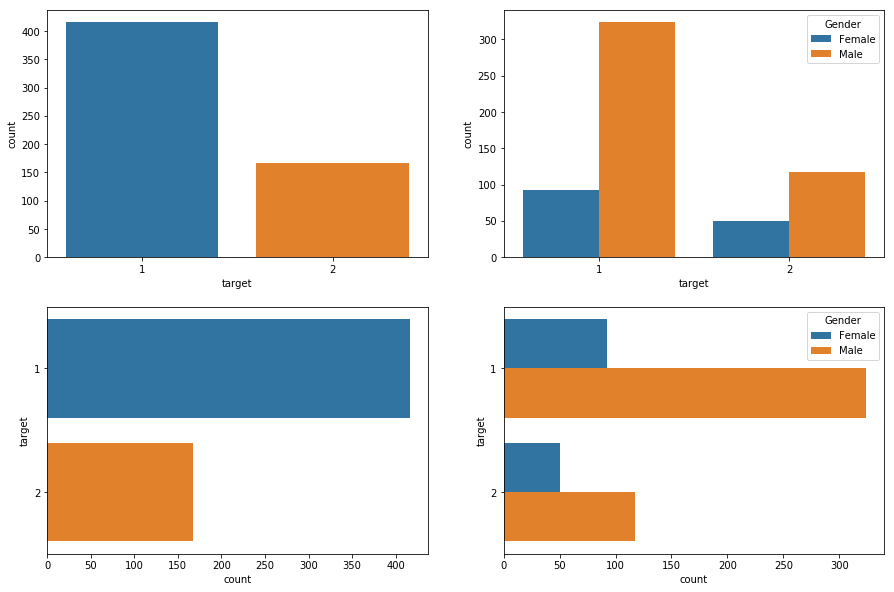

In [8]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.countplot(x="target", data=dataset, ax=axes[0,0])
sns.countplot(x="target", hue="Gender", data=dataset, ax=axes[0,1])
sns.countplot(y="target", data=dataset, ax=axes[1,0])
sns.countplot(y="target", hue="Gender", data=dataset, ax=axes[1,1])

liver_patients, not_liver_patinets=dataset['target'].value_counts()
print("Karaciğer hastası sayısı:{}, \nKaraciğer hastası olmayanların sayısı:{}".\
      format(liver_patients,not_liver_patinets))

 Yukarıda dört grafik yer almaktadır:
* Sol üstteki grafikte, target değişkenin veri setindeki dağılımını göstermektedir. 
* Sağ üstteki grafikte, target değişkenin veri setindeki dağılımını iki ayrı kategori  vermektedir.
* Sol alttaki grafikte, sol üstteki grafiğin yatay görünümü yer almaktadır
* Sağ alttaki grafikte, sağ üstteki grafiğin yatay görünümü yer almaktadır. 

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="5.2."></a>**5.3.Cinsiyet Teşhisi ve  Yüzdeleri**  

countplot() kategorik değerlerin dağılımını özetlemede başarılı olsada, kategorik değerlerin yüzdelik dilimi hakkında açıklayıcı değildir. Pie chart yüzdelik dilimleri göstermede daha başarılıdır. Seaborn kütüphanesinde pie chart olmadığı için pandas kütüphanesinde yer alan pie çizim fonksiyonu kullanılacaktır.

Text(0.5,1,'Hastaların Cinsiyet Yüzdeleri')

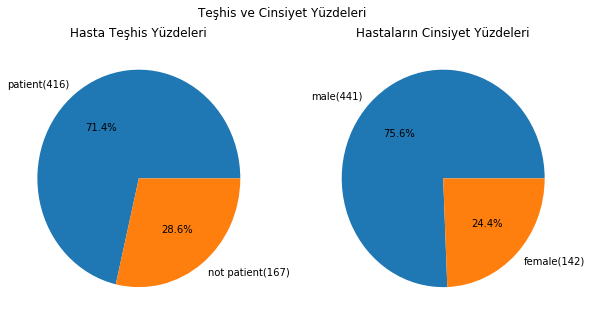

In [9]:
target_counts=dataset['target'].value_counts().values
gender_counts=dataset['Gender'].value_counts().values

fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,5))
fig1.suptitle("Teşhis ve Cinsiyet Yüzdeleri")

target_sizes=dataset.groupby('target').size()
axes[0].pie(
    x=target_counts,
    labels=['patient({})'.format(target_sizes[1]),'not patient({})'.format(target_sizes[2])],
    autopct='%1.1f%%'
)
axes[0].set_title("Hasta Teşhis Yüzdeleri")

gender_sizes=dataset.groupby('Gender').size()
axes[1].pie(
    x=gender_counts, 
    labels=['male({})'.format(gender_sizes['Male']), 'female({})'.format(gender_sizes['Female'])], 
    autopct="%1.1f%%"
)
axes[1].set_title("Hastaların Cinsiyet Yüzdeleri")


# <a class="anchor" id="e2."></a>**5.4.Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:swarmplot()**  

İki değişken arasındaki ilişkiyi en iyi gösteren grafiklerden biri scatter(serpilme ) grafiğidir. 

Scatter grafiği iki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır. Aralarındaki ilişkinin sebebi görülemese de, ilgili iki değişkenin arasında direkt olarak bir ilişki bulunup bulunmadığı ve bu ilişkinin ne derece güçlü olduğu görülebilir.

swarmplot iki değişkenden birinin kategorik olduğu durumlarda kullanışlıdır. Kategorik değişken üzerinde sürekli değişkenin dağılımını veri noktaları üst üste gelmeyecek şekilde gösterir. 

In [10]:
def plot_categorical_dist(dataset, categorical_feature, rows, cols, plot_type):
    fig, axarr=plt.subplots(nrows=rows,ncols=cols, figsize=(15,10))
    features=dataset.columns.values[:-1]
    
    counter=0
    
    for i in range(rows):
        for j in range(cols):
            feature=features[counter]
            if "swarm" in plot_type:
                sns.swarmplot(x=categorical_feature,y=feature, data=dataset, ax=axarr[i, j])
            elif "box" in plot_type:
                sns.boxplot(x=categorical_feature, y=feature, data=dataset,ax=axarr[i,j])
            elif "violin" in plot_type:
                sns.violinplot(x=categorical_feature, y=feature, data=dataset,ax=axarr[i,j])
            counter=counter+1
            if counter>=len(features):
                break
    
    plt.tight_layout()
    plt.show()

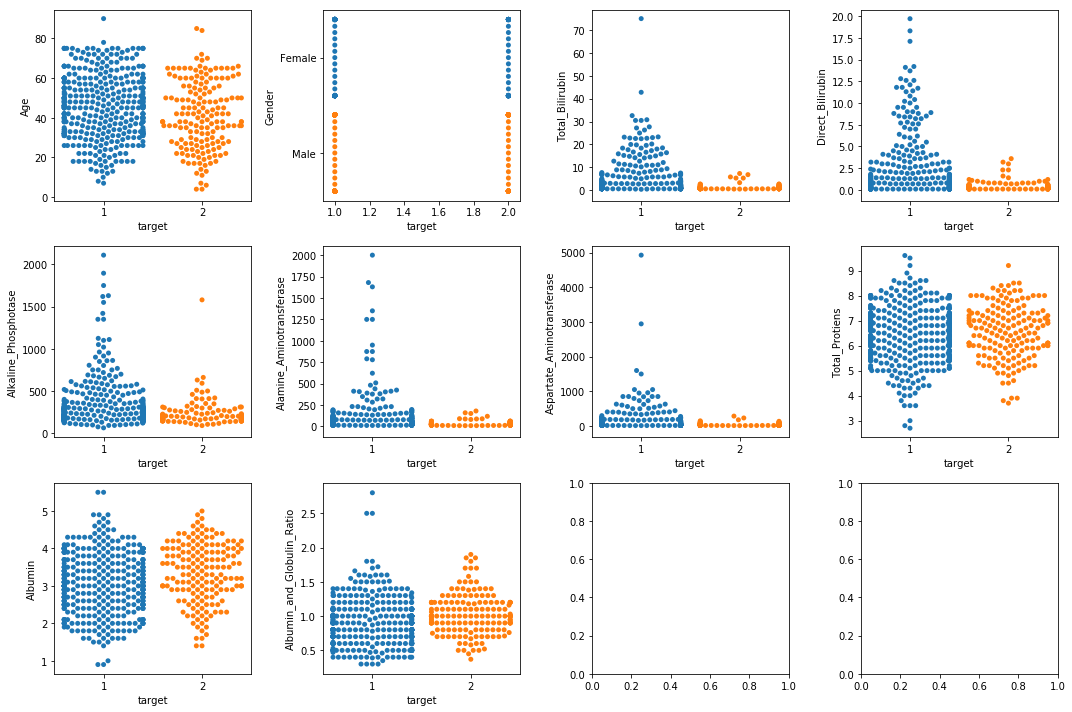

In [11]:
plot_categorical_dist(dataset=dataset, 
                      categorical_feature='target',
                      rows=3, 
                      cols=4,
                     plot_type="swarm")

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="e3."></a>**5.5.Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:boxplot()**  

boxplot kategorik ve sürekli değişken arasındaki ilişki istatiksel bilgileren içerecek şekilde veribilen bir grafi türüdür. boxplot alt ve üst sınırları belirleyen iki çizgi, bir kutu ve kutunun içinde bir çizgiden oluşur. Altı çizgi, verilerdeki min değerini gösterireken, üst çizgi verilerdeki max değerini gösterir. Kutu, Q1 ve Q3 çeyreklikleri arasındaki değer aralığını gösterir. Kutu içersindeki çizgi orta değeri gösterir. 


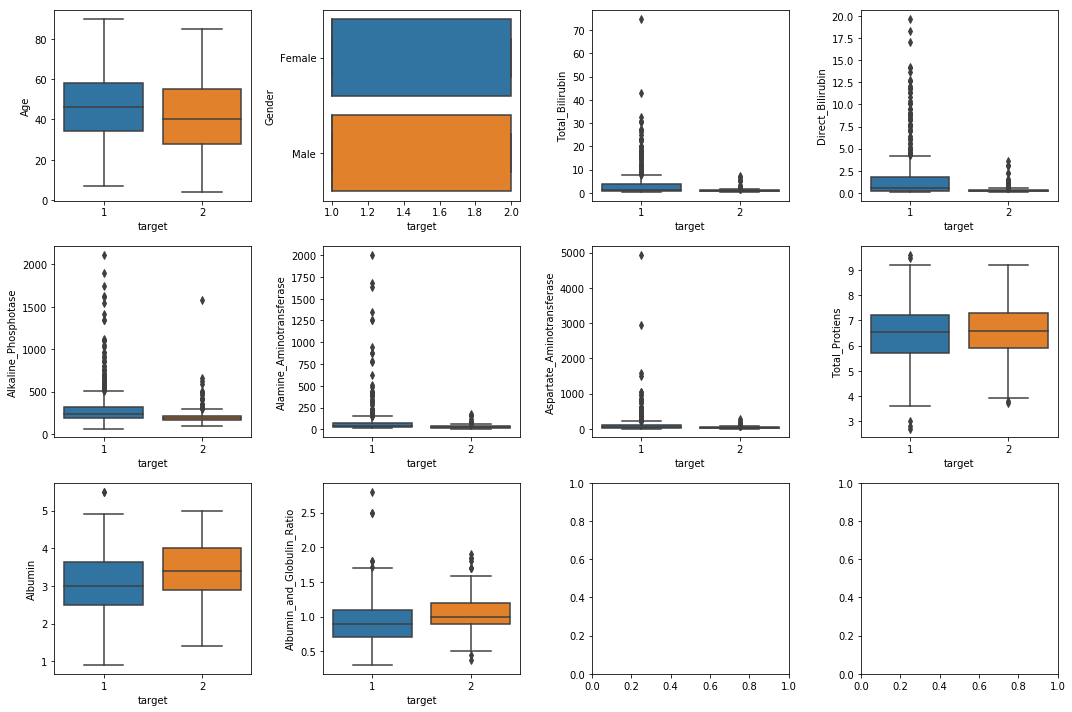

In [12]:
plot_categorical_dist(dataset=dataset, 
                      categorical_feature='target',
                      rows=3, 
                      cols=4,
                     plot_type="box")

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="e4."></a>**5.6. Çıktı Değişkeni İle Özellik Değerlerinin İlişkisi:violinplot()**  

violinplot, boxplot görselini daha yuşak halidir diyebiliriz. Veri dağılımı hakkında kesin istatiksel bilgiler vermek yerine verinin nasıl dağıldığını gösterir. 

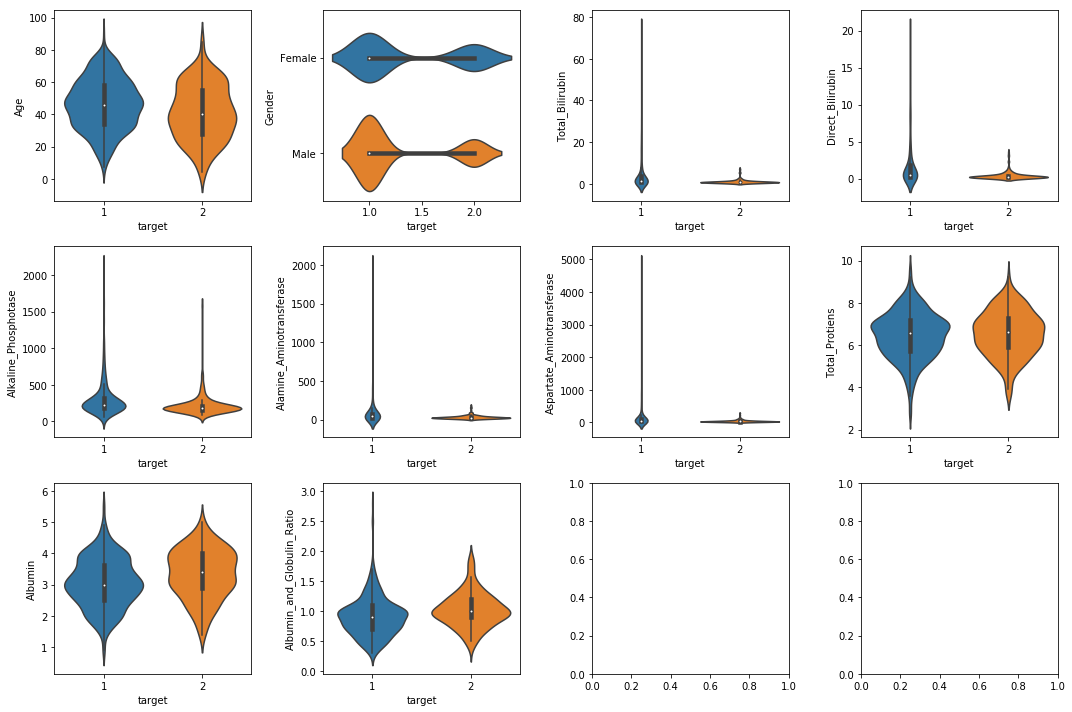

In [13]:
plot_categorical_dist(dataset=dataset, 
                      categorical_feature='target',
                      rows=3, 
                      cols=4,
                     plot_type="violin")

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.e5."></a>**Metin Değerlerinin Sayısal Değerlere Dönüştürülmesi**  

Bu noktadan sonra yapılacak görselleştirmeler için veri setindeki tüm özelliklerin sayısal değer içermesi gerekiyor. Veri setinde sadece 'Gender' özelliği sayısal değer içermemektedir. Bu özelliğin tutuğu değerlerin sayısal dönüştürülmesi gerekir. 'Gender' değişkeninde iki farklı kategorik değer vardır; Male, Female. Bu iki kategorik değeri nominal yapıdadır. Yani aralarında büyüklük küçüklük durumu yoktur. Bu nedenle OneHot Encoding yöntemiyle sayısala dönüştürülmesi gerekir.  

Pandas DataFrame nesnesinde yer alan get_dummies() fonksiyonu veri setinde string olan özelliklerin sayısal değere dönüşümünü OneHot Encoding yöntemiyle yapmaktadır. 

In [14]:
dataset=pd.get_dummies(dataset)

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="5.3."></a>**5.7. Özellik Değerlerinin Histogramları**  

Tek bir değişkenli(univariate) dağılımları göstermek için histogram ve kde çok kullanışlı grafikledir. Histogram belirli aralıktaki değerlerin sıklığını kutularlar gösterirken, kde histogram kurularının üstlerinin çizgiyle birleştirilmesinden elde edilir.   

In [15]:
#dataset.hist(figsize=(10,12))

def draw_hist(dataset, rows, cols):
    fig, axes=plt.subplots(nrows=rows, ncols=cols, figsize=(15,12))
    names=dataset.columns.values
    counter=0
    for i in range(rows):
        for j in range(cols):
            if counter>=len(names):
                break
            name=names[counter]
            sns.distplot(a=dataset[name], ax=axes[i,j])
            
            counter+=1

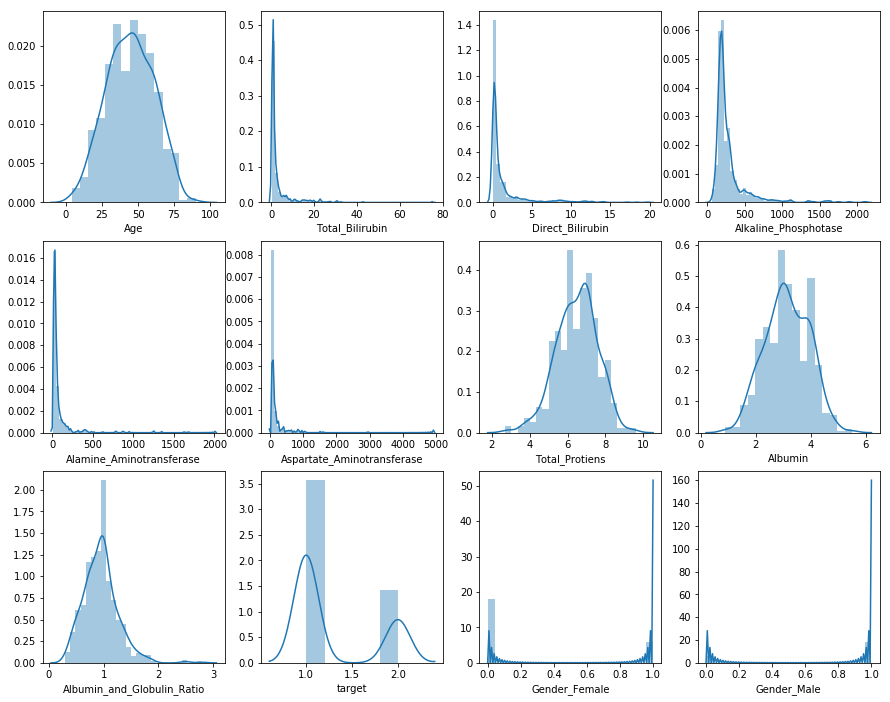

In [16]:
draw_hist(dataset=dataset, rows=3, cols=4)

Yukarıdaki grafiklerde özelliklerin değer dağılımı görülmektedir. Çoğu makine öğrenmesi yöntemi normal(Gaussian) dağılıma sahip veriler üzerinde daha iyi sonuç verir. Normal dağılımda kde çizgisi **çan(veya eskiden okullarda hademelerin salladığı zil** şeklinde görülür. Yukarıdarıdaki grafikler incelendiğinde Age, Total_Proteins ve Albumin özelliklerin kde çizimi normal dağılıma yakın olduğu görülüyor.  

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="5.3e1."></a>**5.8.Özellik Değerlerinin Birbirleriyle Olan İlişkisi**  

Tüm değişkenler arasından ilişkiyi göstermek yer darlığı nedeniyle kullanışlı olmayabiliyor. Bu nedenle aralarında korelasyonu en fazla olan ilişkileri görseleştirelim.

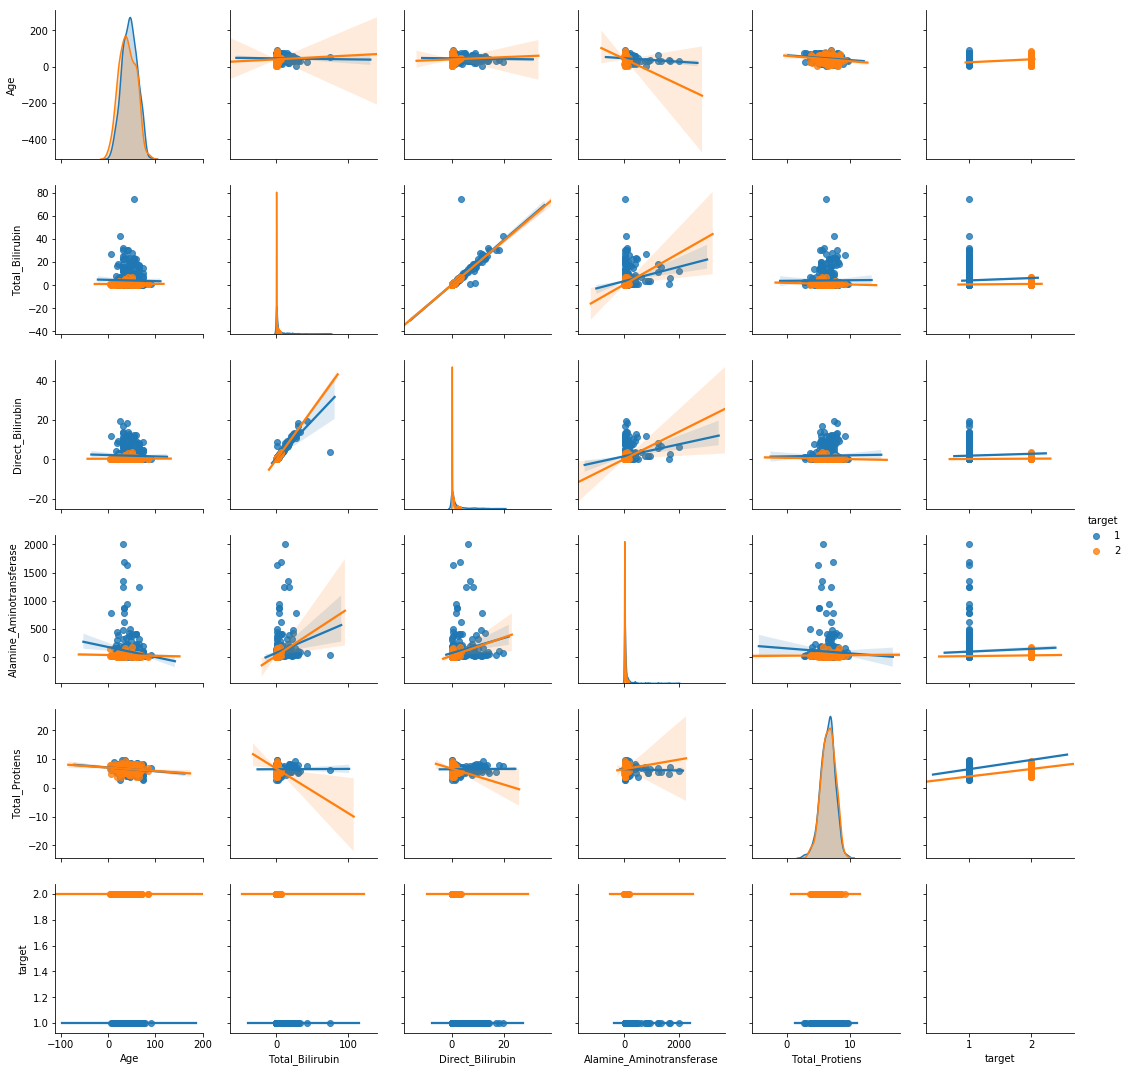

In [17]:
selected_pair_cols=['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
           'Alamine_Aminotransferase','Total_Protiens','target' ]
sns.pairplot(data=dataset[selected_pair_cols], hue="target", kind='reg')

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.5."></a>**5.9. Özelliklerin Birbirleriyle Korelasyonu: Korelasyon Matrisi** 

Korelasyon matrisi yukarıdaki ilişki düzenlerini gösteren tüm grafiklerin sunduğu bilgilerinde bir derece sunabilen, bana göre en kullanışlı görselleştirme türüdür.

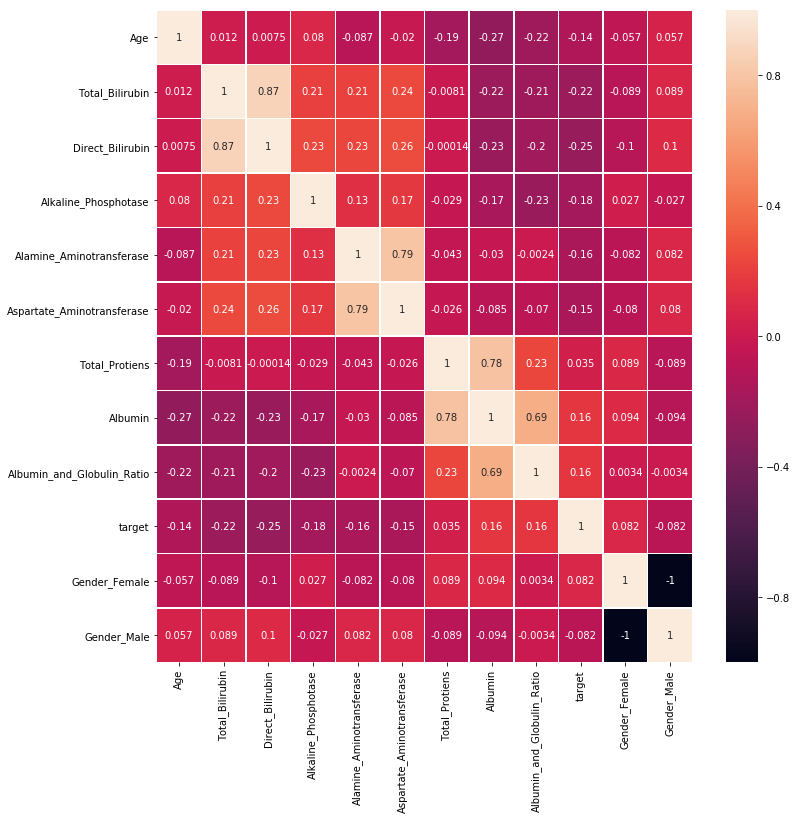

In [18]:
corr_matrix=dataset.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="5.5e1."></a>**5.10. Çıktı Değişkeni İle En Yüksek Korelasyona Sahip Özellikler**  

Çıktı değişkeni ile korelasyonu yüksek olan değerleri küçükten büyüğü sıralayalım

In [19]:
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
       
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("{} İle En Yüksek Korelasyona Sahip Özellikler".format(target_name))

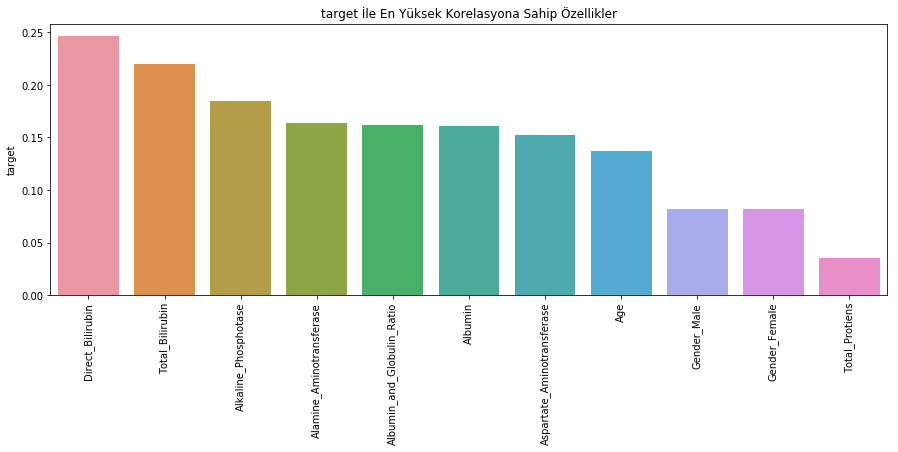

In [20]:
show_corr(dataset=dataset, target_name='target')

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="5.5e2."></a>**5.11. Birbirleriyle En Yüksek Korelasyona Sahip Özellikler** 

Birbirleriyle en yüksek korelasyona sahip özellikleri korelasyon matrisi kullanarak elde edebiliriz. 

In [21]:
corr_matrix=dataset.corr().abs()
sorted_corr=(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sorted_corr.head()

Gender_Female             Gender_Male                   1.000000
Total_Bilirubin           Direct_Bilirubin              0.874618
Alamine_Aminotransferase  Aspartate_Aminotransferase    0.791966
Total_Protiens            Albumin                       0.784053
Albumin                   Albumin_and_Globulin_Ratio    0.686322
dtype: float64

Scatterplot kullanarak,  birbirleriyle yüksek korelasyona sahip özelliklerin dağılımlarını görselleştirelim.

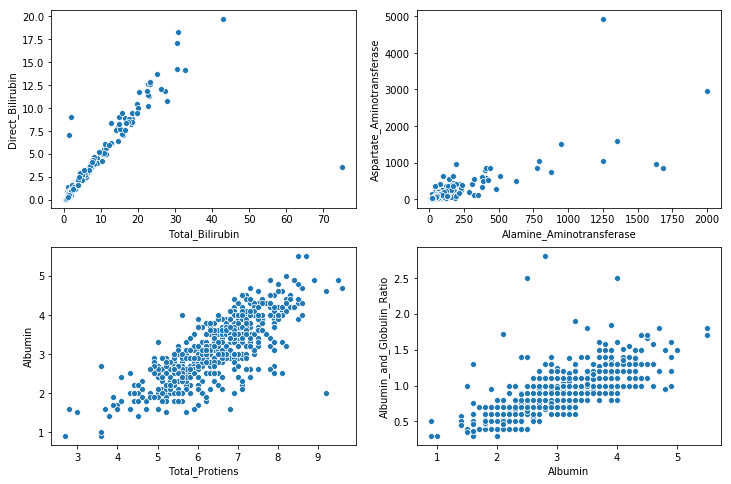

In [22]:
x_vars=['Total_Bilirubin', 'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin']
y_vars=['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio']

fig, axarr=plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axarr=axarr.flatten()
for i in range(len(x_vars)):
    sns.scatterplot(data=dataset, x=x_vars[i], y=y_vars[i], ax=axarr[i])

Yukarıdaki grafiklerde, özellikler arasındaki korelasyon gözlemlenebiliyor. 

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="6."></a>**6. Makine Öğrenmesi Modelinin Kullanılması**  

Veri setinin makine öğrenmesi modeline verilmeden önce yapılması gereken işlemler:
1. Veri setinin data ve target olarak ayrıştırılması; X, y
1. Data kısmının normalleştirilmesi 
1. Data ve target ın eğitim ve test kümelerine ayrışltırılması

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="6.1."></a>**6.1. Veri Setinin 'data' ve 'target' Olarak Ayrıştırılması**  

In [23]:
#Veri seti data ve target olarak ayrıştırılır
X=dataset.drop('target', axis=1) #data
y=dataset['target'] # target

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="6.2."></a>**6.2. Ölçeklendirme**  

In [24]:
#Data kısmı normalleştirilir
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="6.3."></a>**6.3. Veri Setinin Eğitim ve Test Bölümlerine Ayrıştırılması**  

In [25]:
#Eğitim ve test kümelerine ayrıştırılır
X_train, X_test, y_train, y_test=train_test_split(X,y, stratify=y, test_size=0.3,random_state=42)

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="6.4."></a>**6.4. Kullanılacak Makine Öğrenmesi Modelleri**  

In [26]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="6.5."></a>**6.5. Kullanılan Makine Öğrenmesi Modelleri İçin Elde Edilen Sonuçlar**  

In [27]:

for name, model in models:
    
    clf=model

    clf.fit(X_train, y_train)

    y_pred=clf.predict(X_test)
    print(10*"=","{} için Sonuçlar".format(name).upper(),10*"=")
    print("Başarı oranı:{:0.2f}".format(accuracy_score(y_test, y_pred)))
    print("Karışıklık Matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
    print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test,y_pred)))
    print(30*"=")

========== LR IÇIN SONUÇLAR ==========
Başarı oranı:0.72
Karışıklık Matrisi:
[[124   1]
 [ 48   2]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.72      0.99      0.84       125
           2       0.67      0.04      0.08        50

   micro avg       0.72      0.72      0.72       175
   macro avg       0.69      0.52      0.46       175
weighted avg       0.71      0.72      0.62       175

========== NB IÇIN SONUÇLAR ==========
Başarı oranı:0.54
Karışıklık Matrisi:
[[47 78]
 [ 2 48]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.96      0.38      0.54       125
           2       0.38      0.96      0.55        50

   micro avg       0.54      0.54      0.54       175
   macro avg       0.67      0.67      0.54       175
weighted avg       0.79      0.54      0.54       175

========== KNN IÇIN SONUÇLAR ==========
Başarı oranı:0.65
Karışıklık Matrisi:
[[95 30]
 [31 19]]
Sınıfland

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="7."></a>**7. Çapraz Doğrulama** 

Bir önceki bölümde kullanılan makine öğrenmesi modellerinin sonuçları veri setinin eğitim ve test bölümleri kullanılarak elde edilmiştir. Bu şekilde edilen sonuç, kullanılan makine öğrenmesi modelinin performansını tam olarak yansıtmaz. Daha kararlı sonuçlar elde etmek için modelin birden fazla test edilmesi gerekir. **Çapraz doğrulama** makine öğrenmesi modelinin birden fazla test edilmesi için geliştirilmiş istatisksel bir yaklaşımdır.

Çapraz doğrulama için önerilmiş farklı yöntemler olmasına rağmen en çok bilinene yöntem K-fold(k-katlı) çapraz doğrulama yöntemidir. Bu yönteme göre veri seti, k eşit parçaya ayrıştırılır. Parçalardan biri test için geri kalan k-1 tanesi  eğitim için kullanılır. Bu işlem K defa tekrarlanır. Her bir tekrarda test için farklı parça kullanılır. Böylece her bir parçanın eğitim ve test aşamasında kullanılması garanti edilmiş olur. 

In [28]:
import mglearn

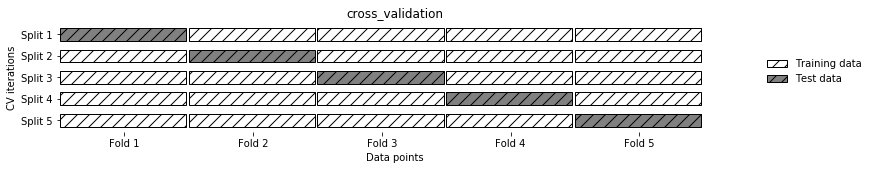

In [29]:
mglearn.plots.plot_cross_validation()

Yukarıdaki şekilde K-fold çapraz doğrulamanı görselleştirilmesi yer almaktadır. Veri seti 5 eşit parçaya ayrıştırılır. Parçalardan koyu olarak renklendirilmiş bölümler test için diğer bölümler eğitim için kullanılır. Her bir iterasyonda farklı bölüm test için kullanılır, böylece her bir parçanın eğitim ve test aşamasında kullanılması garanti edilmiş olur. 

[İçindekiler Menüsüne Git](#0.)

## <a class="anchor" id="7.1."></a>**7.1. Çapraz Doğrulama Sonuçları** 

In [30]:
for name, model in models:
    kfold=KFold(n_splits=5, random_state=42)
    cv_result=cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    print("{} modelinin çağraz doğrulama sonucu:{:0.2f}".format(name,cv_result.mean()))

LR modelinin çağraz doğrulama sonucu:0.72
NB modelinin çağraz doğrulama sonucu:0.56
KNN modelinin çağraz doğrulama sonucu:0.62
DT modelinin çağraz doğrulama sonucu:0.65
SVM modelinin çağraz doğrulama sonucu:0.71
LDA modelinin çağraz doğrulama sonucu:0.72


Çapraz doğrulama sonuçları, bir önceki bölümde elde edilen başarı oranlarından biraz düşük sonuçlar vermiştir. Ancak çapraz doğrulama sonuçları modelin performansını daha gerçekci şekilde ortaya koyduğu için gerçek dünya uygulamalarında mutlaka gerçekleştirilmesi gerekli bir adımdır. 

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="8."></a>**8. GridSearchCV İle En İyi Sınıflandırıcının Bulunması**   

In [31]:
params_clfs=list()

svm_params=[
    {'kernel':['rbf'], 'gamma':[1e-3, 1e-4]},
    {'kernel':['linear'], 'C':[1, 10, 100, 1000]}       
]
params_clfs.append((SVC(),svm_params))


lr_params= {'penalty':['l1', 'l2'], 'C':np.logspace(0, 4, 10)}
params_clfs.append((LogisticRegression(),lr_params))

clf=DecisionTreeClassifier()
dt_params={'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1],
          'random_state':[123]}
params_clfs.append((DecisionTreeClassifier(),dt_params))

In [32]:
for clf, param in params_clfs:
    
    grid_search=GridSearchCV(clf, param, cv=5)
    grid_search.fit(X_train, y_train)
    print(80*"*")
    print("{} İçin sklearn GridSearchCV Sonuçları".format(clf.__class__.__name__))
    print("best params:{}".format(grid_search.best_params_))
    test_means=grid_search.cv_results_['mean_test_score']
    print("ortalama test sonucu:{:.2f}".format(np.mean(test_means)))
    y_pred=grid_search.predict(X_test)
    print("en iyi parametre sonucu:{:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Karışıklık matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
    print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test, y_pred)))
    print(80*"*")

********************************************************************************
SVC İçin sklearn GridSearchCV Sonuçları
best params:{'gamma': 0.001, 'kernel': 'rbf'}
ortalama test sonucu:0.71
en iyi parametre sonucu:0.71
Karışıklık matrisi:
[[125   0]
 [ 50   0]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

   micro avg       0.71      0.71      0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

********************************************************************************
********************************************************************************
LogisticRegression İçin sklearn GridSearchCV Sonuçları
best params:{'C': 166.81005372000593, 'penalty': 'l1'}
ortalama test sonucu:0.72
en iyi parametre sonucu:0.69
Karışıklık matrisi:
[[107  18]
 [ 36  14]]
Sınıflandırma Ra

Yukarıdaki sonuçlara göre en iyi sonucu LogisticRegression sınıflandırıcısın veridiği söyleyebiliriz. Bu sonuçları görselleştirelim.

In [33]:
from yellowbrick.classifier import ClassificationReport

In [34]:
best_clf=LogisticRegression(C= 21.544346900318832, penalty='l1')
best_clf.fit(X_train, y_train)
y_pred=best_clf.predict(X_test)
print("Baları oranı:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("Karışıklık matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test, y_pred)))

Baları oranı:0.70
Karışıklık matrisi:
[[110  15]
 [ 38  12]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.74      0.88      0.81       125
           2       0.44      0.24      0.31        50

   micro avg       0.70      0.70      0.70       175
   macro avg       0.59      0.56      0.56       175
weighted avg       0.66      0.70      0.66       175



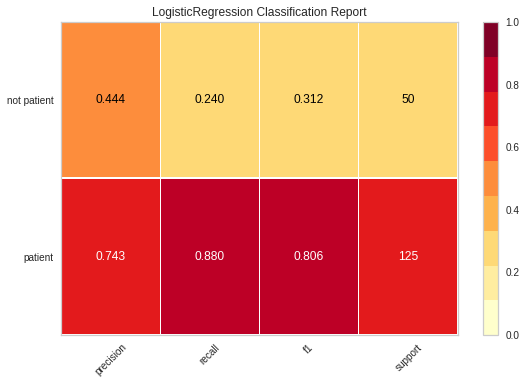

In [35]:
visualizer = ClassificationReport(best_clf, classes=['patient','not patient'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="9."></a>**9. ROC ve AUC** 

ROCAUC (Receiver Operating Characteristic/Area Under the Curve) grafiği,  sınıflandırıcının duyarlılığı ve özgüllüğü arasındaki farkı görmesini sağlar.



In [36]:
from yellowbrick.classifier import ROCAUC

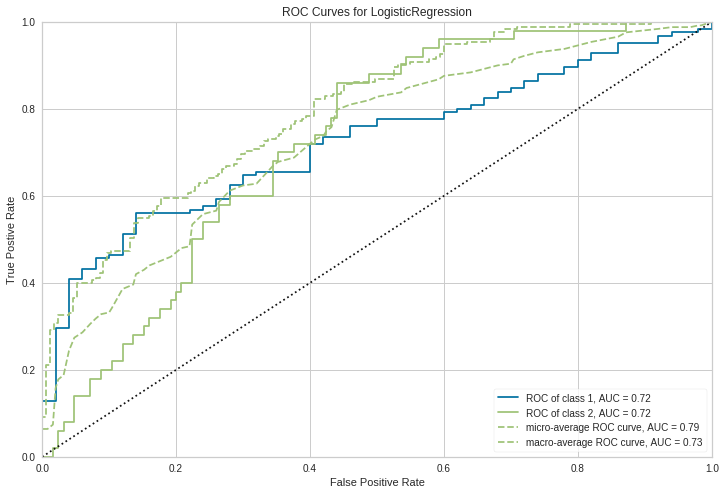

In [37]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
roc_auc=ROCAUC(best_clf, ax=ax)
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)

roc_auc.poof()

Receiver Operating Characteristic (ROC) eğrileri, modellerin duyarlılığı ve özgüllüğü arasındaki dengeyi karşılaştıran ve görselleştiren bir sınıflandırıcının tahmin edilebilir kalitesinin bir ölçüsüdür. ROC eğrisi Y ekseni üzerindeki gerçek pozitif oranını ve X ekseni üzerindeki yanlış pozitif oranını hem global ortalama hem de sınıf bazında gösterir. Bu nedenle ideal nokta, grafiğin sol üst köşesidir: yanlış pozitifler sıfırdır ve gerçek pozitifler birdir.

ROC, başka bir metrik olan; eğrinin altındaki alan (AUC) hesaplamasına imkan verir. AUC yanlış pozitifler ve gerçek pozitifler arasındaki ilişkiyi hesaplar. AUC ne kadar yüksekse, model genellikle o kadar iyidir. Bununla birlikte, eğrinin "dikliğini" kontrol etmek de önemlidir, çünkü bu, yanlış pozitif oranı en aza indirirken gerçek pozitif oranın maksimize edildiğini açıklar. 

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="10."></a>**10. İş Akışının Otomatikleştirilmesi: Pipeline**  

Makine öğrenmesinin veri setleri üzerinde uygulamasının standart iş akışı vardır. Bu iş akışını otomatikleştirmek için sklearn Pipeline(boru hattı) nesnesini sunmaktadır. Pipeline, makine öğremesi için yapılması gerekli olan ölçeklendirme, özellik çıkarma ve modelleme gibi işlemleri sırasıyla yapmaya olanak sağlar. Pipeline, tüm veri setinde aynı işlemin yapılmasını garanti ederek eğitim ve test verilerinin tutarlı olmasını garanti eder.

In [38]:
work_flows_std = list()
work_flows_std.append(('standardize', StandardScaler()))
work_flows_std.append(('logReg', LogisticRegression(C= 21.544346900318832, penalty='l1')))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred=model_std.predict(X_test)


In [39]:

print("Başarı oranı:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("Karışıklık matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test, y_pred)))

Başarı oranı:0.69
Karışıklık matrisi:
[[107  18]
 [ 36  14]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80       125
           2       0.44      0.28      0.34        50

   micro avg       0.69      0.69      0.69       175
   macro avg       0.59      0.57      0.57       175
weighted avg       0.66      0.69      0.67       175



In [40]:
work_flows_pca = list()
work_flows_pca.append(('pca', PCA(n_components=7)))
work_flows_pca.append(('logReg', LogisticRegression(C= 21.544346900318832, penalty='l1')))
model_pca = Pipeline(work_flows_pca)
model_pca.fit(X_train, y_train)
y_pred=model_pca.predict(X_test)

In [41]:
print("Başarı oranı:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("Karışıklık matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test, y_pred)))

Başarı oranı:0.71
Karışıklık matrisi:
[[113  12]
 [ 39  11]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.74      0.90      0.82       125
           2       0.48      0.22      0.30        50

   micro avg       0.71      0.71      0.71       175
   macro avg       0.61      0.56      0.56       175
weighted avg       0.67      0.71      0.67       175



[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="11."></a>**11. Makine Öğrenmesi Modelinin Kaydedilmesi: Serialization**  

Programlamada elde edilen görüntü, csv dosyalar vb. verileri bilgisayar diskine kaydedip daha sonra kullanılabilecek dosya formatları mevcutur. Örneğin görüntü dosyaları .jpg, .png gibi dosya türlerine kaydedilip daha sonra kullanılabilir.  Ancak, dizi, nesne, model vb. gibi verilerin kaydedilebileceği dosya formatları yoktur. Bu tür dosyaların daha sonra kullanımı  için genel bir çözüm olan serileştirme işlemi yapılır.

sklearn serileştirme işlemini koyalca yapılmasını sağlayan joblib kütüphanesini sağlar. 

In [42]:
print(os.listdir(".."))

['src', 'lib', 'input', 'working']


Model joblib.dump() fonksiyonu kullanılarak kaydediliyor.

In [43]:
dosya_adi="../working/model_pca.pickle"
joblib.dump(model_pca,dosya_adi)

['../working/model_pca.pickle']

Kaydedilmiş model joblib.load() fonksiyonu kullanılarak yükleniyor.

In [44]:
loaded_model=joblib.load('../working/model_pca.pickle')

Yüklenilen model, test verilerinin tahmin edilmesinde kullanılıyor. 

In [45]:
y_pred=loaded_model.predict(X_test)
print("Başarı oranı:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("Karışıklık matrisi:\n{}".format(confusion_matrix(y_test, y_pred)))
print("Sınıflandırma Raporu:\n{}".format(classification_report(y_test, y_pred)))

Başarı oranı:0.71
Karışıklık matrisi:
[[113  12]
 [ 39  11]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.74      0.90      0.82       125
           2       0.48      0.22      0.30        50

   micro avg       0.71      0.71      0.71       175
   macro avg       0.61      0.56      0.56       175
weighted avg       0.67      0.71      0.67       175



Çalışma hakkında yorumlarınızı merakla bekliyorum. Çalışmayı beğenirseniz oy vermeyi unutmayın lütfen!